In [1]:
import galsim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
P = galsim.Gaussian(fwhm=0.35)

# Just making up something complicated for P0
P0 = 0.3*galsim.Gaussian(fwhm=0.08).shift(-0.02, 0.01)
P0 += 0.7*galsim.Moffat(fwhm=0.06, beta=5.0).shear(g1=0.2, g2=0.2).shift(-0.02, 0.0)

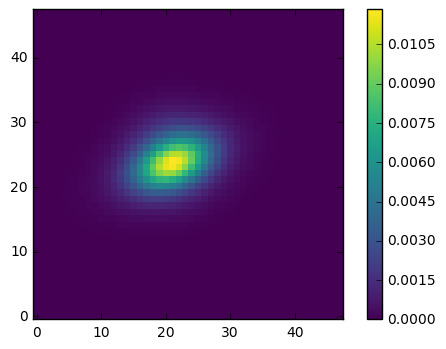

In [3]:
# Note that by default, drawImage includes integration over the pixel, which may or may not be what you want.
# If you just want to sample the surface brightness profile on a grid instead of integrating over the pixels,
# add the kwarg method='no_pixel' or method='sb'.  See the drawImage docstring for more info.
P0_image = P0.drawImage(nx=48, ny=48, scale=0.008, method='no_pixel')
plt.imshow(P0_image.array)
plt.colorbar()

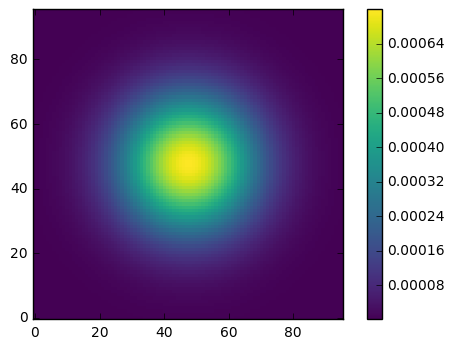

In [4]:
# Note different shape and scale
P_image = P.drawImage(nx=96, ny=96, scale=0.01, method='no_pixel')
plt.imshow(P_image.array)
plt.colorbar()

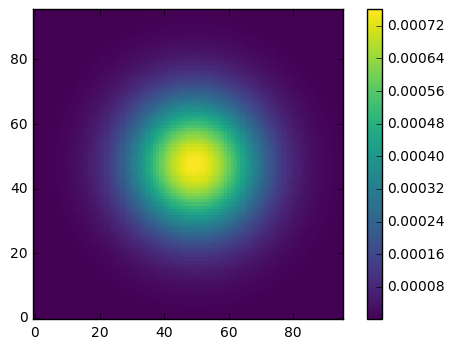

In [5]:
# We can deconvolve the surface brightness profiles.  (GSObjects)
X = galsim.Convolve(P, galsim.Deconvolve(P0))
X_image = X.drawImage(nx=96, ny=96, scale=0.01, method='no_pixel')
plt.imshow(X_image.array)
plt.colorbar()

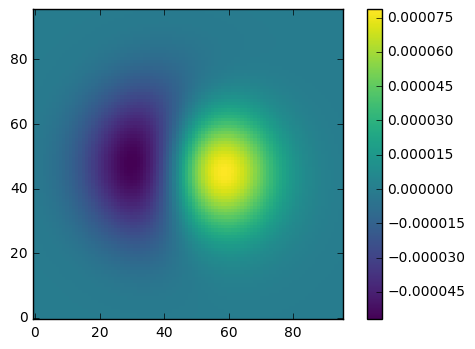

In [6]:
# Hard to see above, so here's proof that X and P are actually different
plt.imshow(X_image.array - P_image.array)
plt.colorbar()

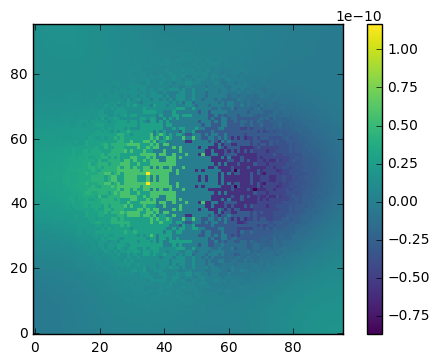

In [7]:
# Let's verify that convolving X by P0 gives us back P
XP0 = galsim.Convolve(X, P0)
XP0_image = XP0.drawImage(nx=96, ny=96, scale=0.01, method='no_pixel')
plt.imshow(XP0_image.array - P_image.array)
plt.colorbar()

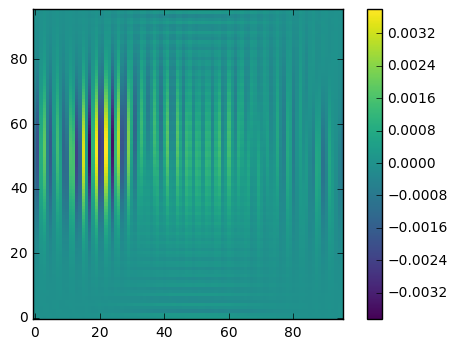

In [8]:
# You can create galsim surface brightness objects (GSObjects) from images using
# InterpolatedImage
PFromImage = galsim.InterpolatedImage(P_image)
P0FromImage = galsim.InterpolatedImage(P0_image)
XFromImage = galsim.Convolve(PFromImage, galsim.Deconvolve(P0FromImage))
XFromImage_image = XFromImage.drawImage(nx=96, ny=96, scale=0.01, method='no_pixel')
plt.imshow(XFromImage_image.array)
plt.colorbar()
# We get weird Fourier ringing nonsense in this case, but never fear...

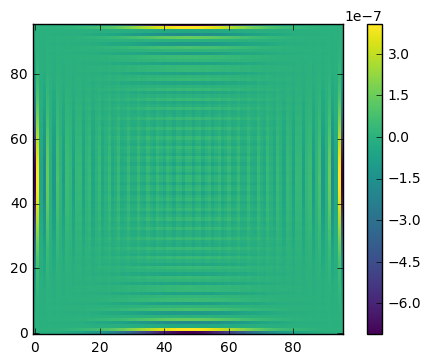

In [9]:
XP0FromImages = galsim.Convolve(XFromImage, P0FromImage)
XP0FromImages_image = XP0FromImages.drawImage(nx=96, ny=96, scale=0.01, method='no_pixel')
plt.imshow(XP0FromImages_image.array - P_image.array)
plt.colorbar()
# ... once convolved with P0FromImage, all is well again.  
# Zero(ish)-difference compared to the original P_image.